In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data file import
# Source https://www.kaggle.com/mirichoi0218/insurance
path = "../data/"
data = pd.read_csv(path + "insurance.csv", sep = ",")

In [3]:
# Data sample
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exercise 1 (2pts)

a) Plot the cost of insurance as a function of age (one point for each person in the data set)

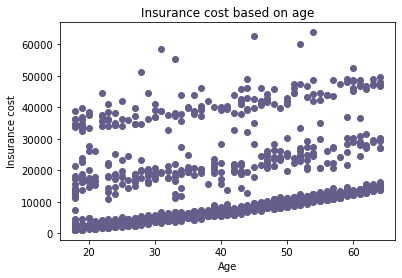

In [6]:
plt.plot(data["age"], data["charges"], "o", c="#655D8A")
plt.xlabel('Age')
plt.ylabel('Insurance cost')
plt.title('Insurance cost based on age')
plt.show()

b) Show in a graph with two subplots the cost of insurance according to age, with one subplot for women and another for men

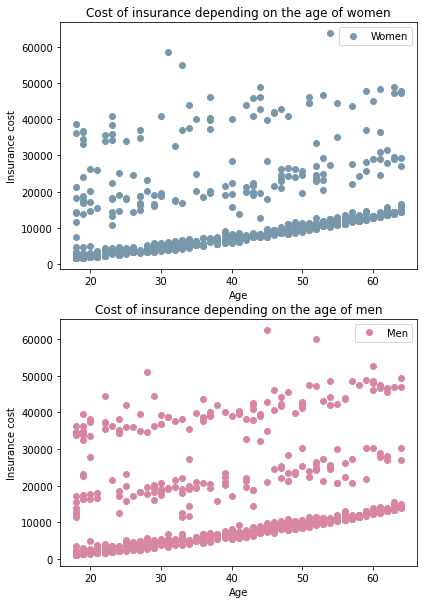

In [8]:
women = data.query("sex == 'female'")
men = data.query("sex == 'male'")

plt.figure(figsize = (6.4, 10))
plt.subplot(2,1,1) 
plt.plot(women["age"], women["charges"], "o", c="#7897AB", label = "Women")
plt.xlabel('Age')
plt.ylabel('Insurance cost')
plt.legend()
plt.title('Cost of insurance depending on the age of women')
plt.subplot(212) 
plt.plot(men["age"], men["charges"], "o", c="#D885A3", label = "Men")
plt.xlabel('Age')
plt.ylabel('Insurance cost')
plt.legend()
plt.title('Cost of insurance depending on the age of men')
plt.show()

c) Show in a graph the cost of insurance according to age, with different colors for smokers and non-smokers. The size of each point should be based on the body mass index (bmi column).

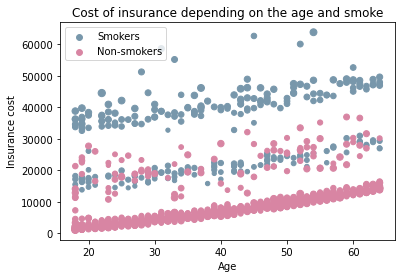

In [10]:
smokers = data.query("smoker == 'yes'")
nonSmokers = data.query("smoker == 'no'")

plt.scatter('age', 'charges', s='bmi', c='#7897AB', data=smokers, label="Smokers")
plt.scatter('age', 'charges', s='bmi', c='#D885A3', data=nonSmokers, label="Non-smokers")

plt.legend()
plt.xlabel('Age')
plt.ylabel('Insurance cost')
plt.title('Cost of insurance depending on the age and smoke')
plt.show()

# Exercise 2 (2pts)

a) Show a histogram with the distribution of the insurance price

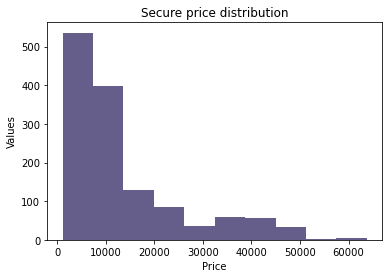

In [12]:
plt.hist(data["charges"], color="#655D8A")
plt.title('Secure price distribution')
plt.xlabel('Price')
plt.ylabel('Values')
plt.show()

b) Show histograms with the distribution of the insurance price according to the region. There are 4 regions, you have to display 4 subplots, each with a histogram.

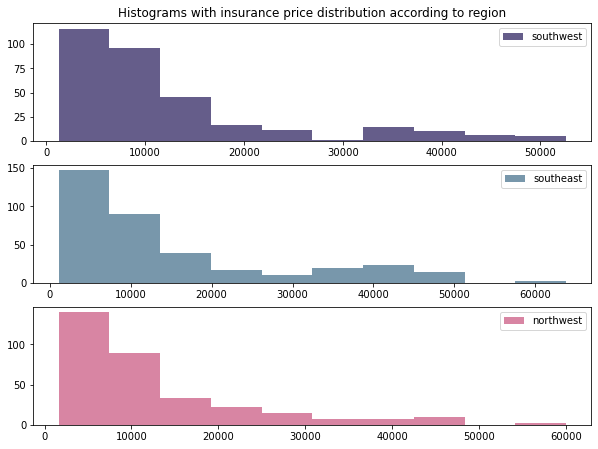

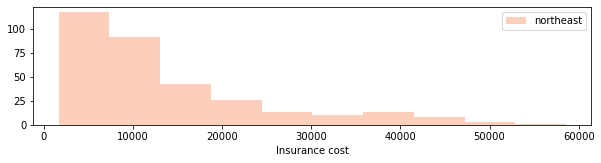

In [13]:
# We divide the data into regions
southwest = data.query("region == 'southwest'")
southeast = data.query("region == 'southeast'")
northwest = data.query("region == 'northwest'")
northeast = data.query("region == 'northeast'")

plt.figure(figsize = (10, 10))
plt.subplot(4,1,1) 
plt.hist(southwest["charges"], label = "southwest", color = "#655D8A")
plt.title("Histograms with insurance price distribution according to region")
plt.legend()

plt.subplot(412) 
plt.hist(southeast["charges"], label = "southeast",  color = "#7897AB")
plt.legend()

plt.subplot(413) 
plt.hist(northwest["charges"], label = "northwest",  color = "#D885A3")
plt.legend()
plt.show()

plt.figure(figsize = (10, 10))
plt.subplot(414) 
plt.hist(northeast["charges"], label = "northeast",  color = "#FDCEB9")
plt.xlabel("Insurance cost")
plt.legend()
plt.show()

# Exercise 3 (1pt)
Show histograms with the distribution of the insurance price according to the region. There are 4 regions, you have to display a histogram for each one on a single 3d graph.

In [14]:
data["charges_cat"] = (data["charges"]/(10000)).astype(int)
data.head()

,age,sex,bmi,children,smoker,region,charges,charges_cat
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,2
4,32,male,28.880,0,no,northwest,3866.85520,0


We divide the data into regions again so that they contain the new column

In [15]:
southwest = data.query("region == 'southwest'")
southeast = data.query("region == 'southeast'")
northwest = data.query("region == 'northwest'")
northeast = data.query("region == 'northeast'")

For each region we make a bar chart with the category (x) and the number of items in that category (y).

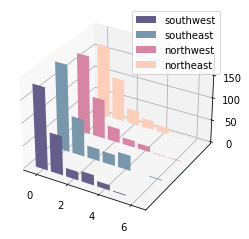

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# To count the number of items in the category
num = southwest.groupby("charges_cat")["charges"].count()

# In each call to bar the position in the third axis, the color and the label are changed
ax.bar(num.index, num,  zs=0, zdir='y', color = "#655D8A", label = "southwest")

num = southeast.groupby("charges_cat")["charges"].count()
ax.bar(num.index, num,  zs=1, zdir='y', color = "#7897AB", label = "southeast")

num = northwest.groupby("charges_cat")["charges"].count()
ax.bar(num.index, num,  zs=2, zdir='y', color = "#D885A3", label = "northwest")

num = northeast.groupby("charges_cat")["charges"].count()
ax.bar(num.index, num,  zs=3, zdir='y', color = "#FDCEB9", label = "northeast")

ax.set_yticks([])
ax.legend()
plt.show()

# Exercise 4 (1pt)
Show in a graph with two subplots the cost of insurance according to age, with one subplot for women and another for men

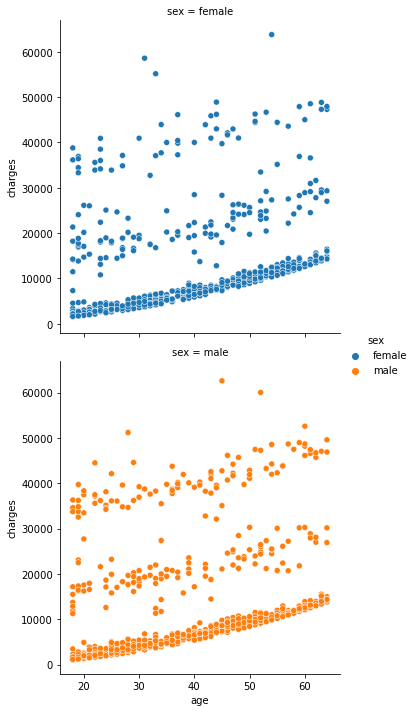

In [18]:
sns.relplot(data = data, x = "age", y = "charges", hue = "sex", row = "sex")